# Part 1, exploratory data analysis (EDA)

Описание датасета - https://archive.ics.uci.edu/ml/datasets/Poker+Hand

1. [1 балл] Загрузка данных - загрузите датасет, посмотрите на его `head` и `tail`. После этого воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T`. 
2. [1 балл] Сколько роял-флэшей удалось получить в датасете?
3. [1 балл] Сколько пар (двоек) было сделано при помощи тузов? 
4. [2 балла] Сколько стритов заканчивались тузом? 
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Как видно на графике - особых корреляций у нас нет, что логично - все зависимости совершенно нелинейны.
7. [3 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать два каких-нибудь осмысленных вопроса и/или визуализаций для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

Предобработка - 5/10, потому что исправлял всякое

Метрики - не стоило пытаться посчитать ROC AUC, эта метрика только для бинарной, а не многоклассовой классификации подходит, о чем даже питон пытался предупредить словами `ValueError: multiclass format is not supported`, а вот classification_report и confusion_matrix - это плюс, так что 4/5

Модельки и визуализации важности признаков - вроде всё ок, вижу, что попытались настройку параметров провести, круто, что разные модели попробовали - код я немного причесал везде, чтобы нагляднее было по структуре - модель - метрики - визуализация, так что здесь 4/5

Итого 5 + 4 + 4 = 13

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

А зачем вы дропнули hand - это ведь целевая категориальная переменная? 
Да и c1 тоже не стоит дропать, это ведь ранг первой карты

In [2]:
data = pd.read_csv(r'C:\Users\vanom\Desktop\MIKRO\Fetisov_Ivan_Poker_Hand.csv')
print('Размер выборки:', data.shape)
#data = data.drop(['hand'], axis=1)
#data = data.drop(['c1'], axis=1)
data.head()


Размер выборки: (800000, 11)


,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,hand
0,4,7,3,5,3,3,1,13,4,8,0
1,2,8,4,9,4,6,4,1,3,7,0
2,3,6,1,3,2,11,3,9,2,3,1
3,2,10,2,5,4,13,3,9,1,6,0
4,3,2,1,3,4,7,3,5,1,11,0


In [4]:
data['s1'] = data['s1'].astype(str)
data['s2'] = data['s2'].astype(str)

In [5]:
# исправил целевую переменную
# категориальные переменные у вас - это масть карты, а непрерывные (по крайней мере мы их непрерывными можем считать - это ранги)

target_var = 'hand'
contin_var = ['c1', 'c2', 'c3','c4', 'c5'] 
categor_var = ['s1','s2', 's3','s4', 's5']  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 11 columns):
s1      800000 non-null object
c1      800000 non-null int64
s2      800000 non-null object
c2      800000 non-null int64
s3      800000 non-null int64
c3      800000 non-null int64
s4      800000 non-null int64
c4      800000 non-null int64
s5      800000 non-null int64
c5      800000 non-null int64
hand    800000 non-null int64
dtypes: int64(9), object(2)
memory usage: 67.1+ MB


In [7]:
data.isnull().sum()

s1      0
c1      0
s2      0
c2      0
s3      0
c3      0
s4      0
c4      0
s5      0
c5      0
hand    0
dtype: int64

In [8]:
data.isnull().sum()/len(data)

s1      0.0
c1      0.0
s2      0.0
c2      0.0
s3      0.0
c3      0.0
s4      0.0
c4      0.0
s5      0.0
c5      0.0
hand    0.0
dtype: float64

# Категориалные

In [9]:
data[categor_var].head()

,s1,s2,s3,s4,s5
0,4,3,3,1,4
1,2,4,4,4,3
2,3,1,2,3,2
3,2,2,4,3,1
4,3,1,4,3,1


In [10]:
len(data['s1'].unique())

4

In [11]:
len(data['s3'].unique())

4

In [12]:
len(data['c3'].unique())

13

In [13]:
len(data['s4'].unique())

4

In [15]:
data_cat = data[categor_var]
data_cat.head()

,s1,s2,s3,s4,s5
0,4,3,3,1,4
1,2,4,4,4,3
2,3,1,2,3,2
3,2,2,4,3,1
4,3,1,4,3,1


In [16]:
# чтобы действительно дамми получить, надо сначала в строки преобразовать значения столбцов
# также не надо кодировать пропущенные столбцы, потому что уже выяснили выше, что пропусков в датасете нет
data_cat = pd.get_dummies(data[categor_var].astype(str), drop_first=True)
data_cat.head()

,s1_2,s1_3,s1_4,s2_2,s2_3,s2_4,s3_2,s3_3,s3_4,s4_2,s4_3,s4_4,s5_2,s5_3,s5_4
0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0
2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
3,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


# непрерывные переменные

In [17]:
data_contin = data[contin_var]
data_contin.head() 

,c1,c2,c3,c4,c5
0,7,5,3,13,8
1,8,9,6,1,7
2,6,3,11,9,3
3,10,5,13,9,6
4,2,3,7,5,11


In [18]:
data_contin.isnull().sum()

c1    0
c2    0
c3    0
c4    0
c5    0
dtype: int64

In [19]:
# исправил здесь на data_cat, чтобы дамми добавить
data = pd.concat([data[target_var],data_contin, data_cat], axis=1)
data.head()

,hand,c1,c2,c3,c4,c5,s1_2,s1_3,s1_4,s2_2,...,s2_4,s3_2,s3_3,s3_4,s4_2,s4_3,s4_4,s5_2,s5_3,s5_4
0,0,7,5,3,13,8,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,8,9,6,1,7,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
2,1,6,3,11,9,3,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,0,10,5,13,9,6,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0,2,3,7,5,11,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


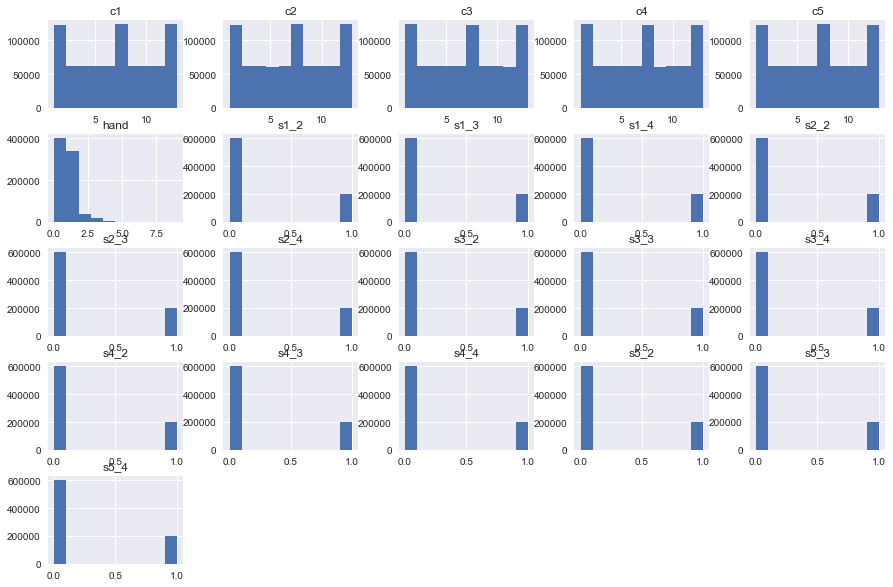

In [20]:
data.hist(figsize=(15, 10));

In [21]:
y = data['hand'].values
x = data.drop('hand', axis=1).values
x.shape, y.shape

((800000, 20), (800000,))

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(560000, 20) (560000,)
(240000, 20) (240000,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
y_predicted = clf_knn.predict(x_test)

Accuracy = 0.6185375
             precision    recall  f1-score   support

          0       0.70      0.71      0.71    120196
          1       0.58      0.57      0.58    101530
          2       0.28      0.26      0.27     11404
          3       0.26      0.24      0.25      5058
          4       0.21      0.21      0.21       927
          5       0.07      0.06      0.07       477
          6       0.10      0.09      0.10       337
          7       0.11      0.06      0.08        69
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1

avg / total       0.62      0.62      0.62    240000



/Users/dmitrys/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


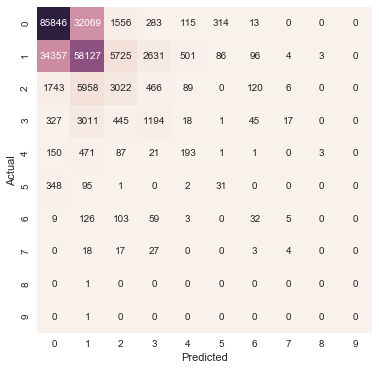

In [25]:
import seaborn as sns 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy =', accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

array = confusion_matrix(y_test, y_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");

In [26]:
from sklearn.tree import DecisionTreeClassifier 

In [27]:
clf_tree = DecisionTreeClassifier()     
clf_tree.fit(x_train, y_train)          
y_predicted = clf_tree.predict(x_test)  
y_proba = clf_tree.predict_proba(x_test)

Accuracy = 0.6307
             precision    recall  f1-score   support

          0       0.72      0.71      0.72    120196
          1       0.60      0.59      0.59    101530
          2       0.27      0.31      0.29     11404
          3       0.34      0.38      0.36      5058
          4       0.22      0.25      0.23       927
          5       0.13      0.19      0.15       477
          6       0.10      0.12      0.11       337
          7       0.23      0.14      0.18        69
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1

avg / total       0.64      0.63      0.63    240000



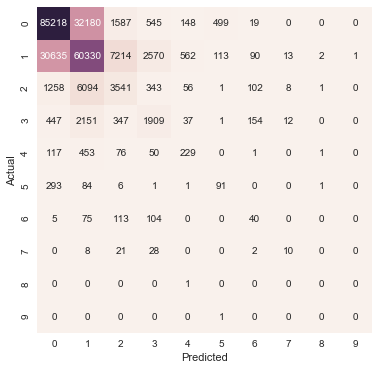

In [28]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

array = confusion_matrix(y_test, y_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");

In [30]:
featureImportance = pd.DataFrame({"feature": data.drop('hand',axis=1).columns, 
                                  "importance": clf_tree.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)

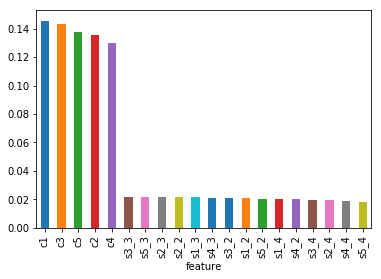

In [93]:
featureImportance["importance"].plot('bar')

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(x_train, y_train)
y_predicted = rfc.predict(x_test)
y_proba = rfc.predict_proba(x_test)

Accuracy = 0.5990166666666666
             precision    recall  f1-score   support

          0       0.62      0.78      0.69    120196
          1       0.56      0.48      0.52    101530
          2       0.28      0.03      0.05     11404
          3       0.39      0.03      0.05      5058
          4       0.10      0.00      0.01       927
          5       0.99      0.71      0.83       477
          6       0.00      0.00      0.00       337
          7       0.00      0.00      0.00        69
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    240000



/Users/dmitrys/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


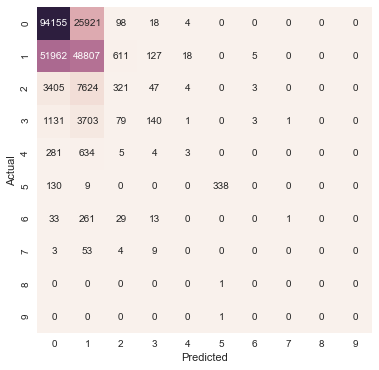

In [33]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

array = confusion_matrix(y_test, y_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");

In [34]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

y_predicted = logit.predict(x_test)

Accuracy = 0.5008166666666667
             precision    recall  f1-score   support

          0       0.50      1.00      0.67    120196
          1       0.00      0.00      0.00    101530
          2       0.00      0.00      0.00     11404
          3       0.00      0.00      0.00      5058
          4       0.00      0.00      0.00       927
          5       0.00      0.00      0.00       477
          6       0.00      0.00      0.00       337
          7       0.00      0.00      0.00        69
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1

avg / total       0.25      0.50      0.33    240000



/Users/dmitrys/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


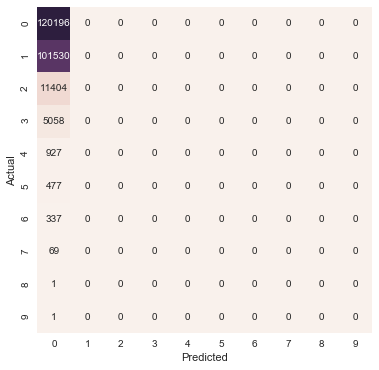

In [35]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

array = confusion_matrix(y_test, y_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");

Судя по метрикам, логит-регрессия здесь совершенно бесполезна, она предсказывает константу.

Так как у нас многоклассовая классификация, то в логистической регрессии будет свой набор коэффициентов для каждого класса (так как по сути, для каждого класса строится своя отдельная модель, которая пытается отделить его от всех остальных - OneVsAll подход). Таким образом, при визулизации важности признаков стоить иметь в виду, что `logit.coef_[0]` возвращает коэффциенты модели, пытающейся предсказать нулевой класс против всех остальных

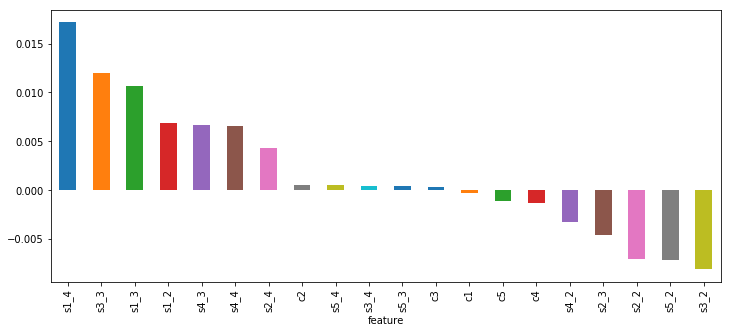

In [102]:
featureImportance = pd.DataFrame({"feature": data.drop('hand',axis=1).columns, 
"importance": logit.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(12,5))
featureImportance["importance"].tail(30).plot('bar', figsize=(12,5))

# Настройка параметров
Прогоняется слишком медленно, так что вырубил

In [39]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(2, 25, 5), 'weights':['uniform', 'distance']}

knc = KNeighborsClassifier()
clf = GridSearchCV(knc, parameters, n_jobs=-1)
clf.fit(x_train, y_train)
clf.best_estimator_

In [ ]:
y_predicted = clf.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

array = confusion_matrix(y_test, y_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");

In [ ]:
parameters = {
              'n_estimators': [10,15,20,25,30],           
              'min_samples_leaf': [1, 3, 5, 7, 10],        
             } 

rfc = RandomForestClassifier(random_state=42)   

gcv = GridSearchCV(rfc, parameters, n_jobs= -1) 
gcv.fit(x, y)
gcv.best_estimator_

In [ ]:
y_predicted = gcv.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

array = confusion_matrix(y_test, y_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");